In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from PIL import Image
import io

def adjust_image_quality(input_path, output_path, quality):
  # 打开图像
  with Image.open(input_path) as img:
    # 保存图像到一个字节流中，质量为指定值
    img_byte_arr = io.BytesIO()
    img.save(img_byte_arr, format='JPEG', quality=quality)

    # 获取压缩后的图像大小
    img_size = img_byte_arr.tell()
    print(f"Compressed image size: {img_size / 1024} KB")

    # 如果需要，可以将压缩后的图像保存到文件
    with open(output_path, 'wb') as output_file:
      output_file.write(img_byte_arr.getvalue())

# 使用示例
input_image_path = "C:/Users/Mubarak/Pictures/Screenshots/屏幕截图 2024-01-11 232447.png"  # 替换为你的图片路径
output_image_path = "C:/Users/Mubarak/Desktop/1/1.png"  # 输出图片的路径
desired_quality = 20  # 质量，范围是 1 (最差) 到 95 (最好)

adjust_image_quality(input_image_path, output_image_path, desired_quality)


OSError: cannot write mode RGBA as JPEG

In [1]:
import pandas as pd

# Recreate the DataFrame from the provided image data
data = {
    "time": ["1-1", "1-2", "1-3", "2-1", "2-2", "2-3", "3-1", "3-2", "3-3", "4-1", "4-2", "4-3", "5-1", "5-2", "5-3"],
    "OFL3": [177456792.7, 45937856.7, 130439756.7, 189707332.7, 153134552.7, 153939332.7, 67130396.7, 44471368.7, 265446072.7, 0, 104391720, 52411864.7, 232825656.7, 104382768.7, 107029600.7],
    "ENRO3": [172768844.5, 0, 40352087.5, 147496321.5, 243341837, 282376973.5, 128946712, 76254557.5, 104202166.5, 637389044.5, 104391720, 637670632.5, 86708512, 0, 0],
    "GAT3": [62548136, 0, 23867700, 69795056, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "MOX 莫西沙星3": [2695386889, 0, 0, 2627892762, 3789554846, 8315871544, 5377521944, 11144529472, 3613359650, 3768872436, 6315808727, 0, 4965873550, 5375849144, 3097983439]
}

df = pd.DataFrame(data)
df


,time,OFL3,ENRO3,GAT3,MOX 莫西沙星3
0,1-1,177456792.7,172768844.5,62548136,2695386889
1,1-2,45937856.7,0.0,0,0
2,1-3,130439756.7,40352087.5,23867700,0
3,2-1,189707332.7,147496321.5,69795056,2627892762
4,2-2,153134552.7,243341837.0,0,3789554846
5,2-3,153939332.7,282376973.5,0,8315871544
6,3-1,67130396.7,128946712.0,0,5377521944
7,3-2,44471368.7,76254557.5,0,11144529472
8,3-3,265446072.7,104202166.5,0,3613359650
9,4-1,0.0,637389044.5,0,3768872436


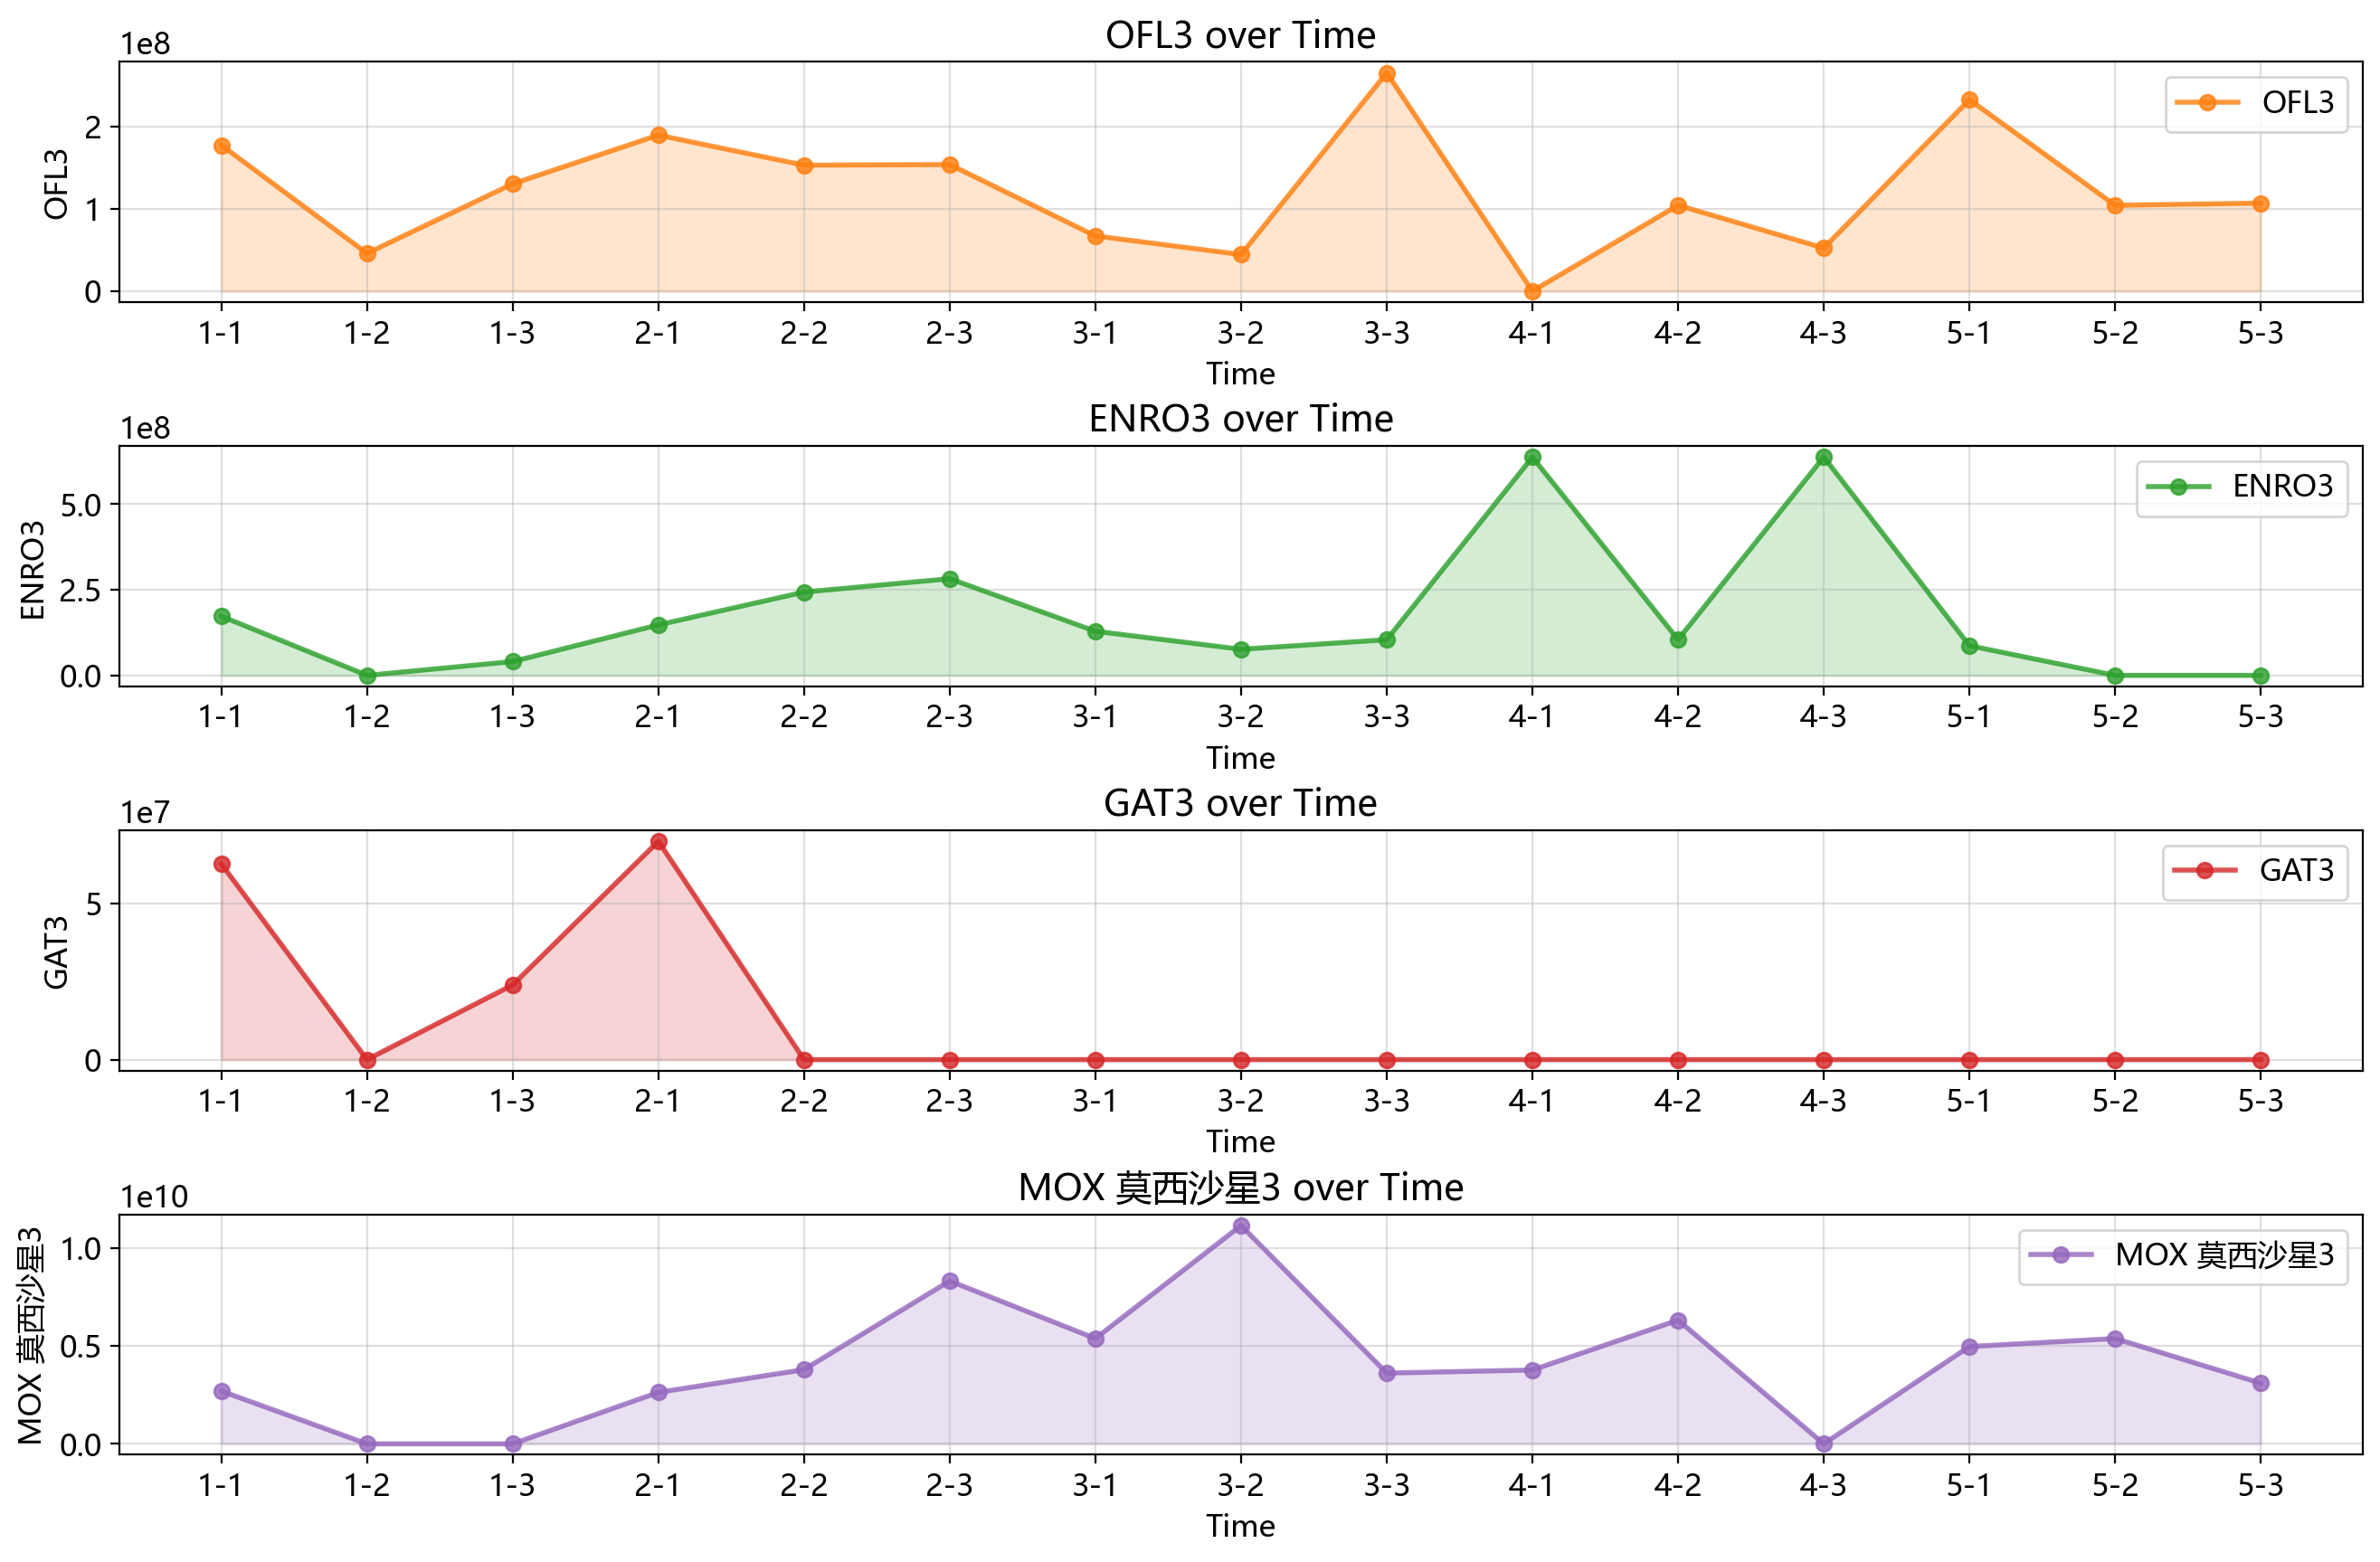

In [3]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "MicroSoft YaHei"
plt.rcParams["font.size"] = 12

# Convert the 'time' column to string type to ensure proper plotting
df["time"] = df["time"].astype(str)

fig = plt.figure(figsize=(16, 10), dpi=200)

colors = plt.cm.tab10.colors


# Function to plot each individual stacked line plot
def plot_stacked_line(df, y_col, title, i):
    ax = fig.add_subplot(4, 1, i)
    ax.plot(
        df["time"], df[y_col], marker="o", label=y_col, color=colors[i], lw=2, alpha=0.8
    )
    ax.fill_between(df["time"], df[y_col], alpha=0.2, color=colors[i])
    ax.set_title(f"{title} over Time")
    ax.set_xlabel("Time")
    ax.set_ylabel(title)
    ax.grid(alpha=0.4)
    ax.legend()


plt.subplots_adjust(hspace=0.6)

# Plotting each of the specified columns
plot_stacked_line(df, "OFL3", "OFL3", 1)
plot_stacked_line(df, "ENRO3", "ENRO3", 2)
plot_stacked_line(df, "GAT3", "GAT3", 3)
plot_stacked_line(df, "MOX 莫西沙星3", "MOX 莫西沙星3", 4)

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import FancyArrowPatch

# 读取中国地图数据（需要提前下载好中国地图的shapefile）
china = gpd.read_file("./shp/chn")

# 读取上海地图数据（需要提前下载好上海地图的shapefile）
shanghai = gpd.read_file("./shp/sh")

# 读取长宁区地图数据（需要提前下载好长宁区的shapefile）
changning = gpd.read_file("./shp/cn")

c:\Users\Mubarak\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\geopandas.py:261: UserWarning: More than one layer found in 'chn': 'gadm41_CHN_0' (default), 'gadm41_CHN_1', 'gadm41_CHN_2', 'gadm41_CHN_3'. Specify layer parameter to avoid this warning.
  result = read_func(


In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib_scalebar.scalebar import ScaleBar

plt.rcParams["font.family"] = "MicroSoft YaHei"

# 读取中国、上海和长宁区的地图数据
china: gpd.GeoDataFrame = gpd.read_file("./shp/chn/gadm41_CHN_2.SHP")
shanghai = gpd.read_file("./shp/sh")
changning = gpd.read_file("./shp/cn")

C:\Users\Mubarak\AppData\Local\Temp\ipykernel_12136\1690212995.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shanghai_center = shanghai.geometry.centroid.iloc[0]


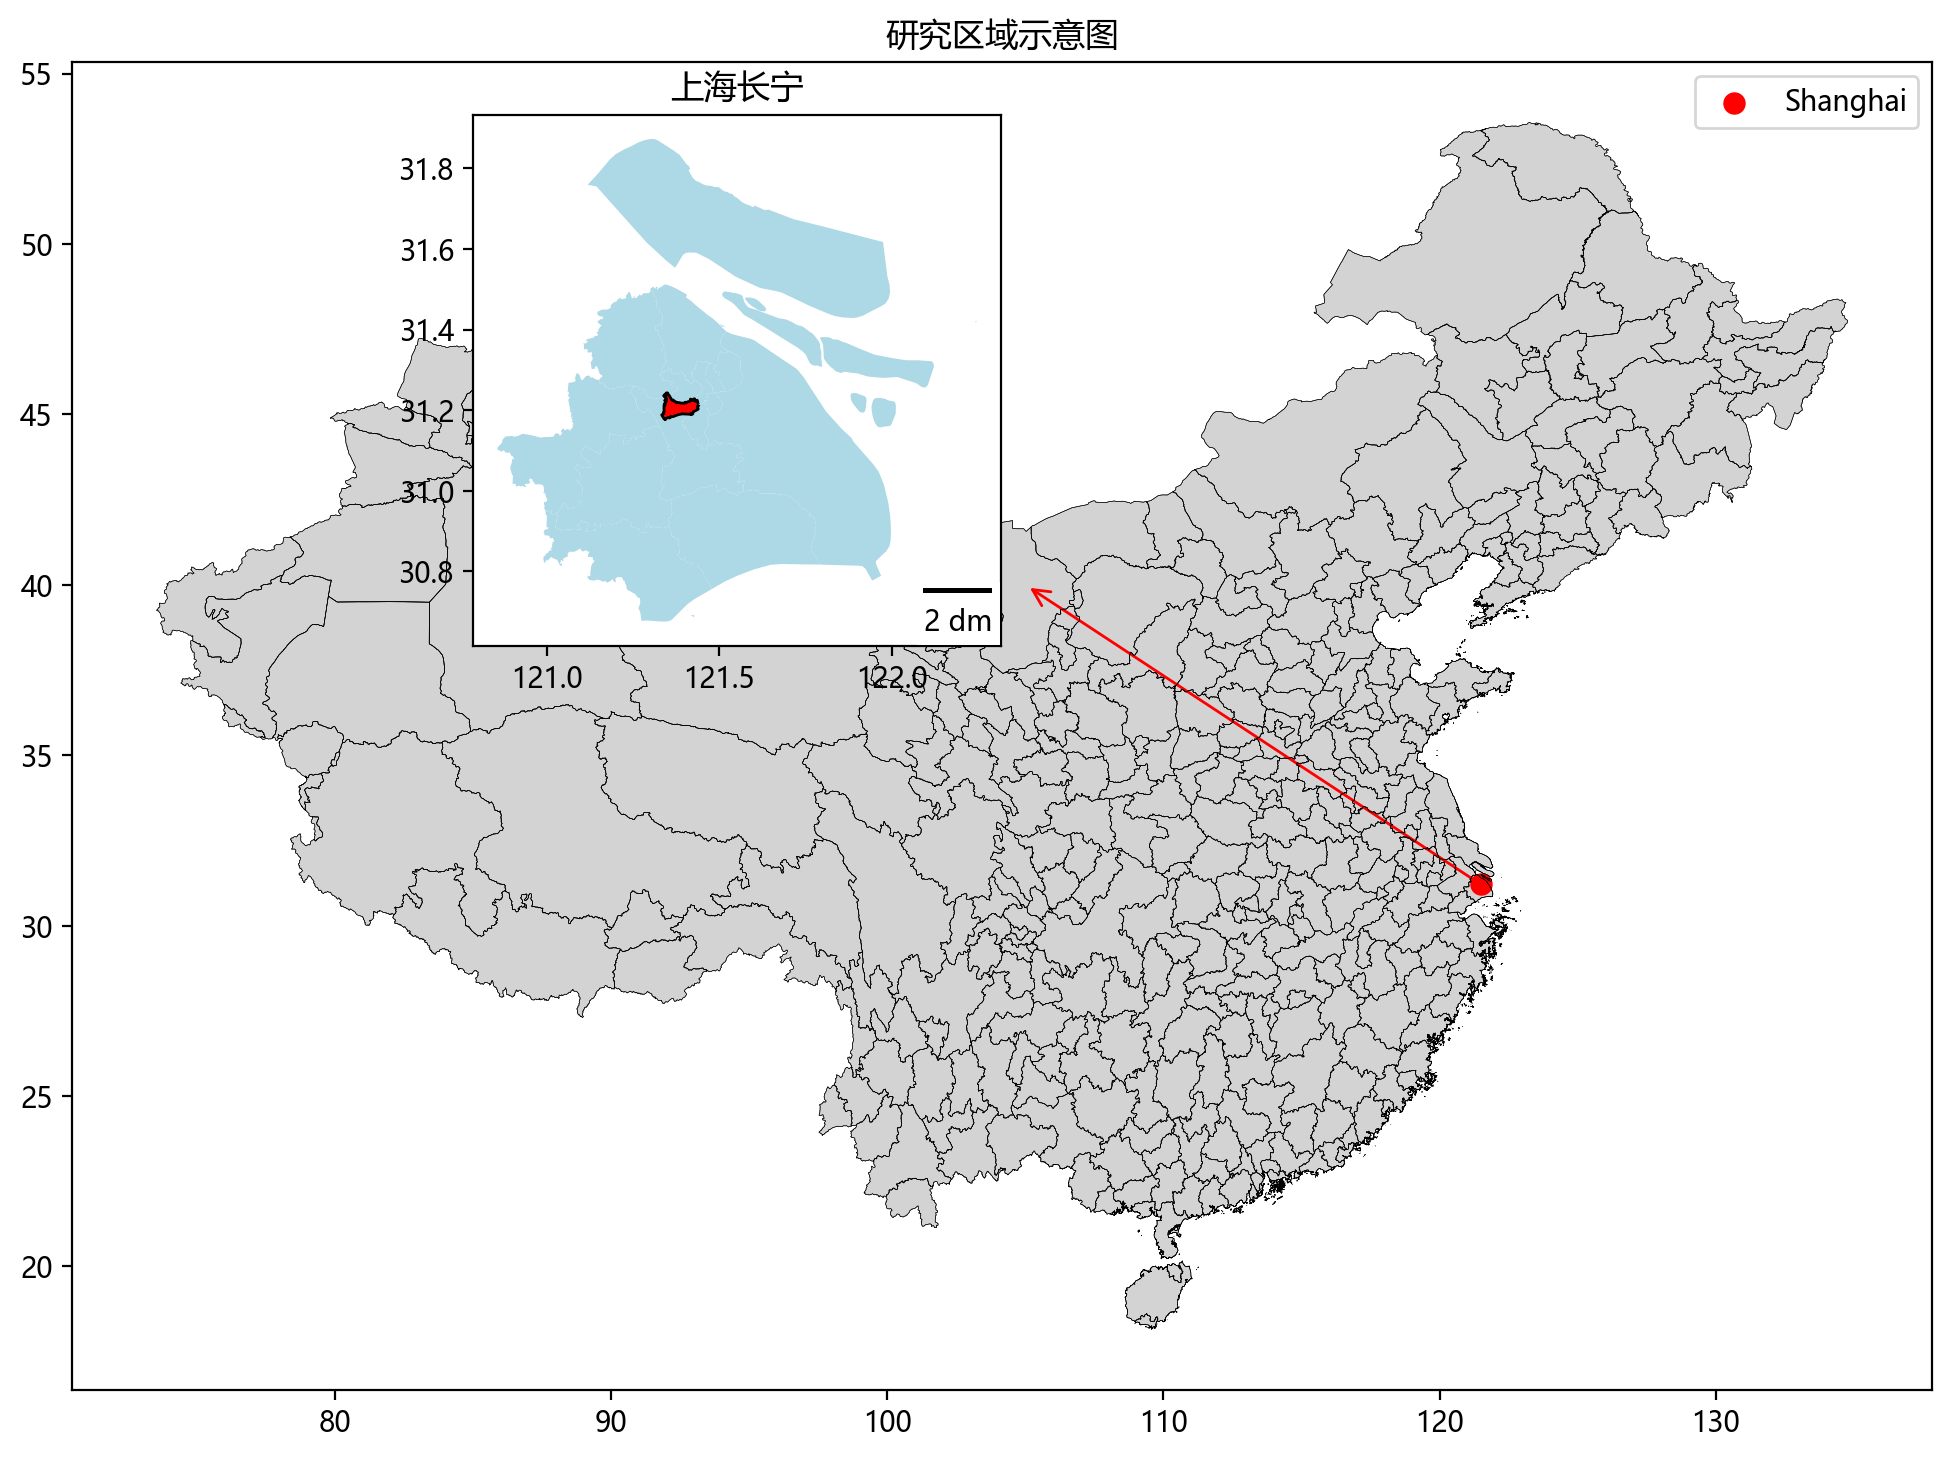

In [19]:
# 创建主图
fig, ax = plt.subplots(figsize=(12, 12), dpi=200)

# 绘制中国地图
china.boundary.plot(ax=ax, linewidth=0.2, color="black", edgecolor="black")

china.plot(ax=ax, color="lightgrey", edgecolor="black", lw=0.2)


# 找到上海的中心坐标
shanghai_center = shanghai.geometry.centroid.iloc[0]
# 使用 ax.scatter 绘制点
ax.scatter(shanghai_center.x, shanghai_center.y, color='red', s=30, label="Shanghai")


# 添加箭头从上海指向外部
arrow = FancyArrowPatch(
    (shanghai_center.x, shanghai_center.y),
    (105, 40),
    color="red",
    mutation_scale=15,
    arrowstyle="->",
)
ax.add_patch(arrow)

# 创建嵌入图框架，用于绘制上海地图
ax_inset = inset_axes(
    ax,
    width="40%",
    height="40%",
    loc="lower left",
    bbox_to_anchor=(0.15, 0.55, 1, 1),
    bbox_transform=ax.transAxes,
)

# 绘制上海地图
shanghai.plot(ax=ax_inset, color="lightblue")

# 在上海地图中标出长宁区
changning.plot(ax=ax_inset, color="red", edgecolor="black")

# 添加比例尺
scalebar = ScaleBar(1, location="lower right")  # 比例尺单位可根据地图数据调整
ax_inset.add_artist(scalebar)

# 设置标题和图例
ax.set_title("研究区域示意图")
ax_inset.set_title("上海长宁")
ax.legend()

plt.show()

C:\Users\Mubarak\AppData\Local\Temp\ipykernel_12136\441554231.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  changning_patch = mpatches.Patch(


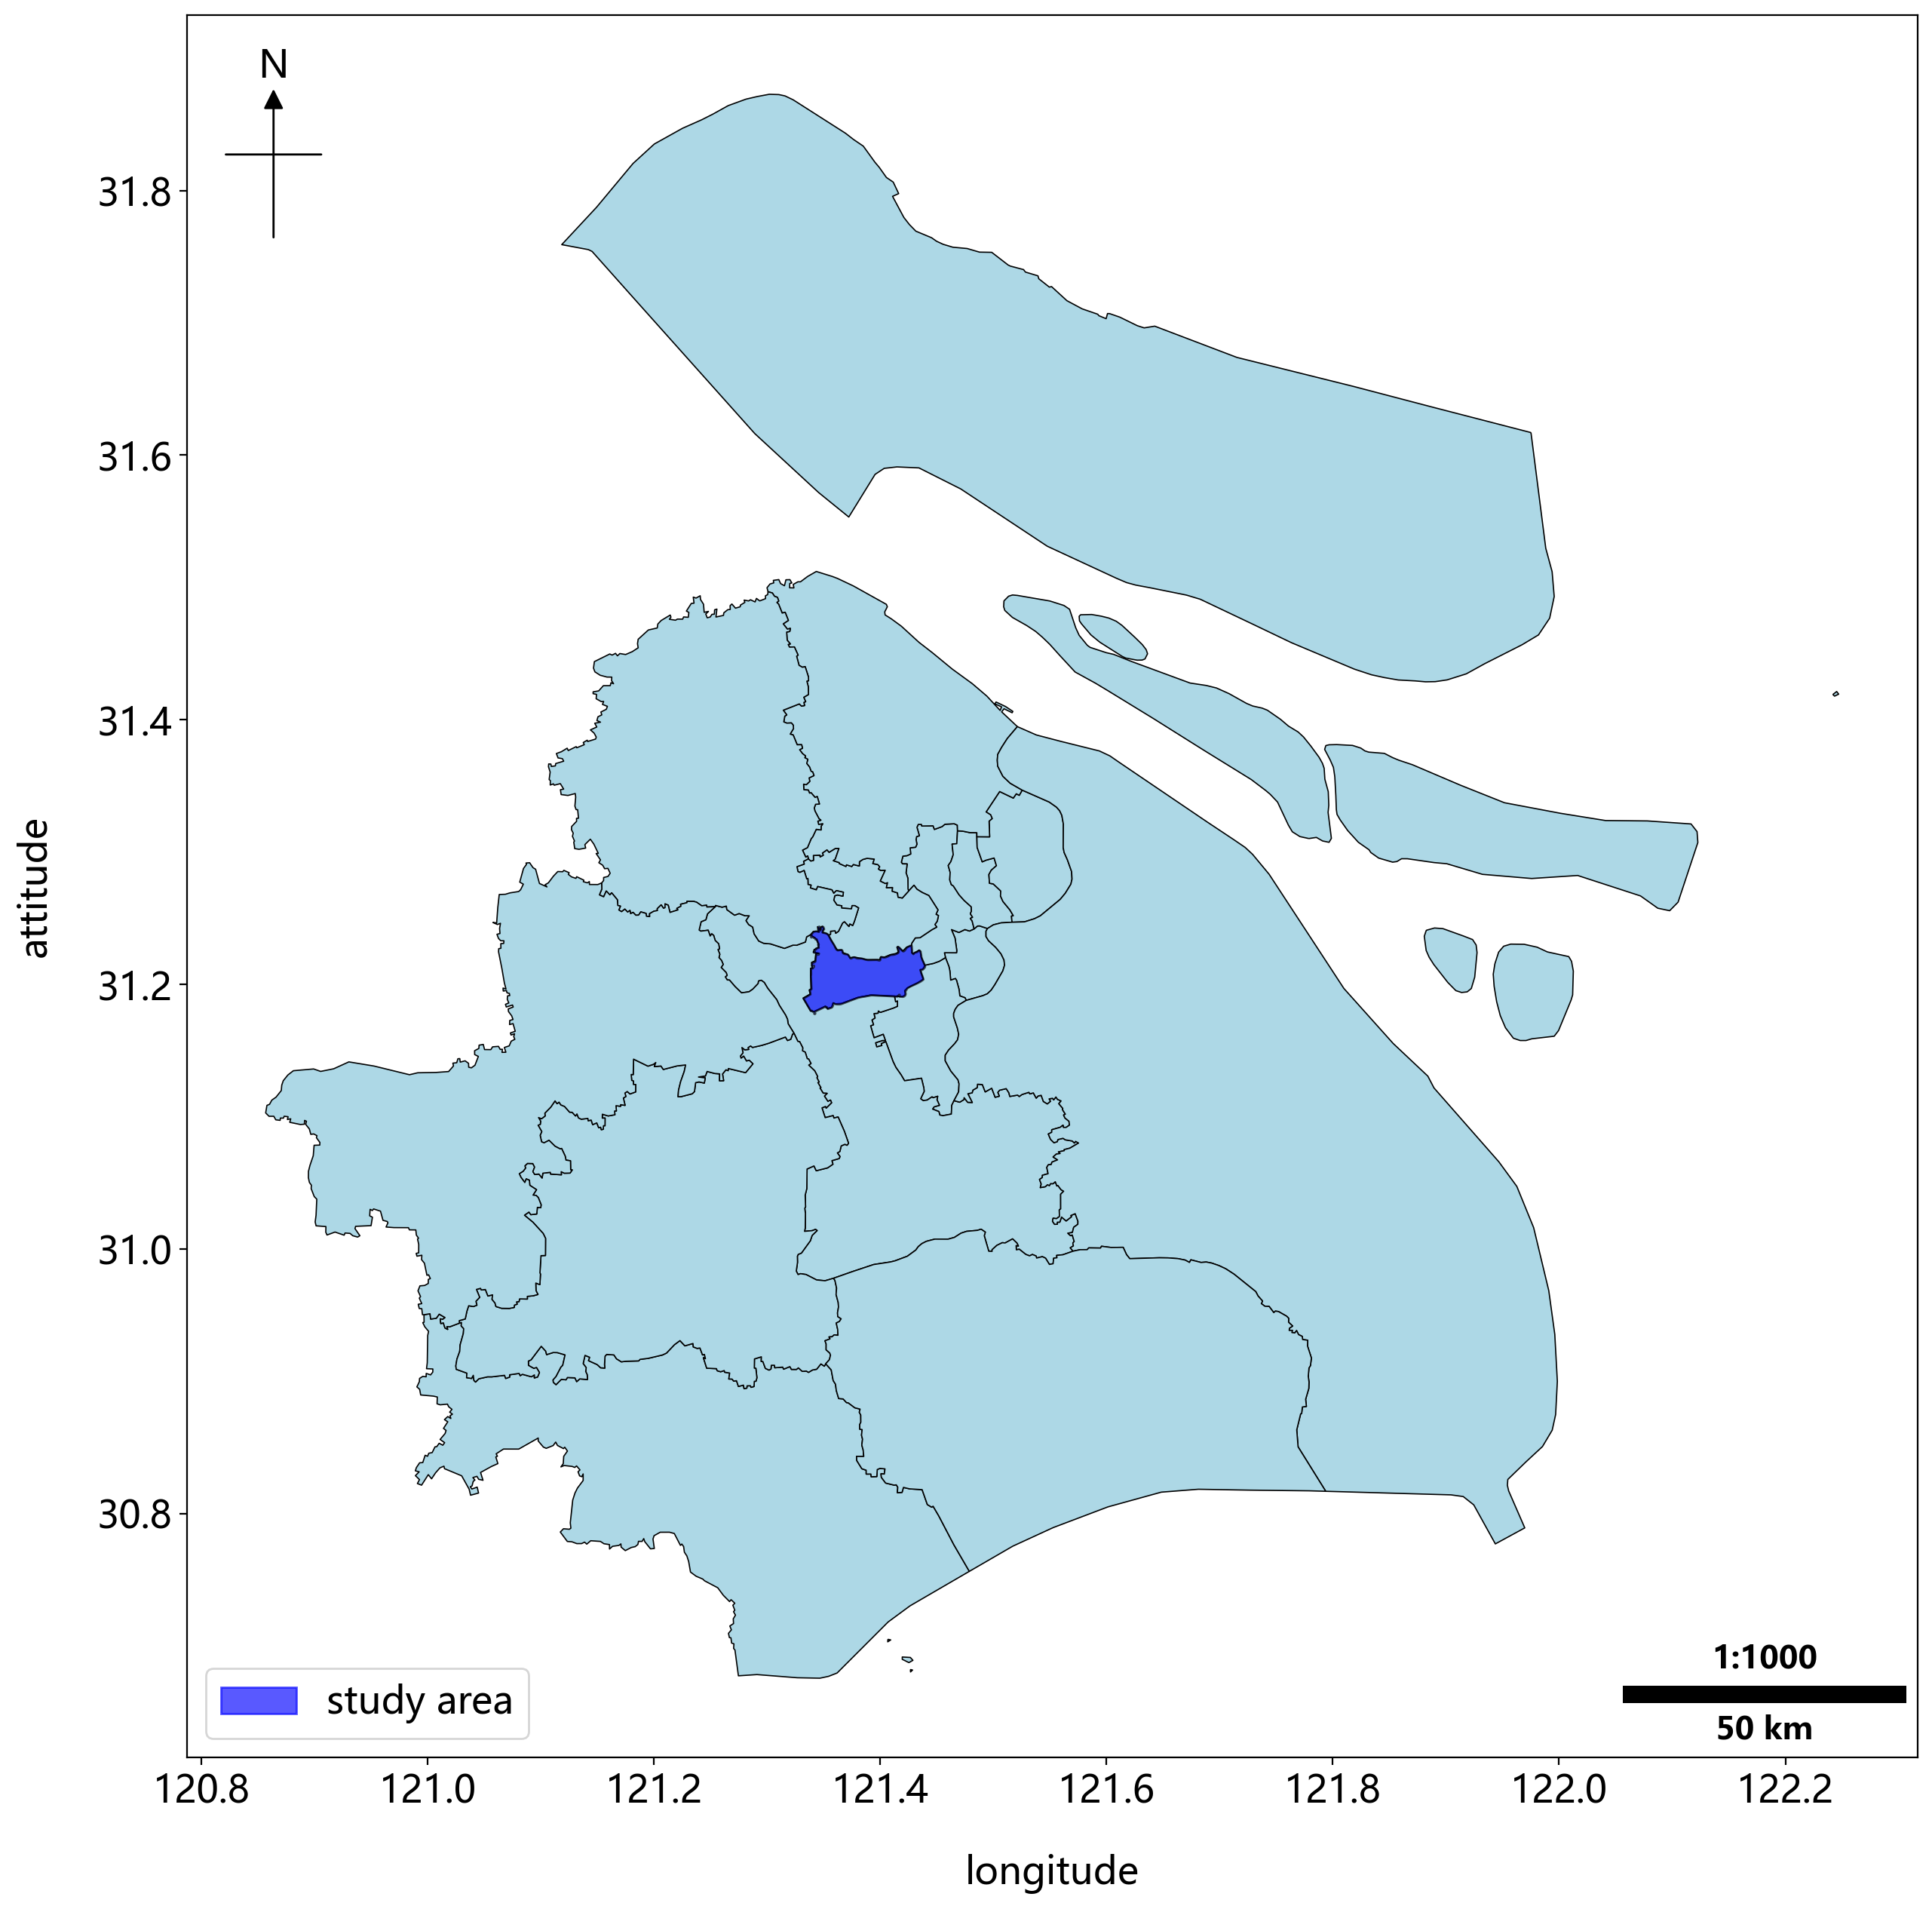

In [90]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar

plt.rcParams["font.size"] = 18

# 读取上海和长宁区的地图数据（假设数据已加载）
shanghai = gpd.read_file("./shp/sh")  # 这里替换为你的上海shapefile路径
changning = gpd.read_file("./shp/cn")  # 这里替换为你的长宁区shapefile路径

# 创建主图
fig, ax = plt.subplots(figsize=(15, 15), dpi=200)

# 绘制上海地图
shanghai.plot(ax=ax, color="lightblue", edgecolor="black", lw=0.6)

# 在上海地图中标出长宁区
changning.plot(ax=ax, color="blue", edgecolor="black", alpha=0.65)

# 创建一个表示长宁区的图例条目
changning_patch = mpatches.Patch(
    color="blue", edgecolor="black", alpha=0.65, label="study area"
)

# 添加图例到主图
ax.legend(handles=[changning_patch], loc="lower left")

# 添加比例尺
# # 添加更专业的比例尺
scalebar = ScaleBar(
    200,
    units="km",
    label="1:1000",
    location="lower right",  # 比例尺位置
    length_fraction=0.2,  # 比例尺长度占轴的比例
    scale_loc="bottom",  # 刻度和标签位置
    width_fraction=0.01,  # 比例尺的宽度
    sep=5,  # 比例尺与标签的距离
    font_properties={"size": "small", "weight": "bold"},  # 字体样式
    box_color="white",  # 背景框颜色
    box_alpha=0.7,  # 背景框透明度
    color="black",
)
ax.add_artist(scalebar)

ax.set_xlabel("longitude", labelpad=20)
ax.set_ylabel("attitude", labelpad=20)

# 添加指北针
arrow = FancyArrowPatch(
    (0.05, 0.87),
    (0.05, 0.96),
    transform=ax.transAxes,
    color="k",
    arrowstyle="-|>",
    mutation_scale=20,
)
ax.add_patch(arrow)
arrow = FancyArrowPatch(
    (0.02, 0.92),
    (0.08, 0.92),
    transform=ax.transAxes,
    color="k",
    arrowstyle="-",
    mutation_scale=20,
)
ax.add_patch(arrow)
ax.text(0.05, 0.97, "N", transform=ax.transAxes, ha="center", va="center")

plt.show()

In [31]:
shanghai.geometry.centroid[0].x

C:\Users\Mubarak\AppData\Local\Temp\ipykernel_12136\1904702864.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shanghai.geometry.centroid[0].x


121.48359701952315